# Milestone 2: Implementing Q Learning

Install the necessary libraries.

In [ ]:
!pip install cmake 'gym[atari]' scipy

Import the gym environment.

In [1]:
import gym
env = gym.make("Taxi-v3").env
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



Initialise the Q Table

In [2]:
import numpy as np
q_table = np.zeros([env.observation_space.n, env.action_space.n])

In [3]:
%%time

# Training an agent

import random
from IPython.display import clear_output

'''Step 1: Set up hyperparameters and start empty for loop for episodes'''

# Hyperparameters
alpha = 0.1
gamma = 0.6
# epsilon = 0.1 

episode = list(range(1, 10001))
reward_in_episode = []


for i in range(1, 10001):
  '''Step 2: Reset everything in episode and start empty while-not-done loop'''
  state = env.reset()

  reward, reward_in_this_epsiode = 0, 0
  done = False

  while not done:
    '''Step 3: Choose action based on exploration vs exploitation'''
    if random.uniform(0, 1) < (1-i)/10000: 
      action = env.action_space.sample()  # Explore a random action
    else:
      action = np.argmax(q_table[state])  # Exploit current best action

    '''Step 4: Take the step, saving the returned values'''
    next_state, reward, done, info = env.step(action)

    reward_in_this_epsiode += reward

    '''Step 5: Calculate the new state-action value and replace the old one in
       the Q table'''
    old_value = q_table[state, action]
    next_max = np.max(q_table[next_state])

    new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
    q_table[state, action] = new_value

    '''Step 6: Update the state'''
    state = next_state

    '''Step 7: Show logs to track progress'''
    '''(Can also use tqdm to do this)'''
    if i % 100 == 0:
      clear_output(wait=True)
      print(f"Episode: {i}")

  reward_in_episode.append(reward_in_this_epsiode)

print("Training finished.\n")

Episode: 10000
Training finished.

CPU times: user 12.4 s, sys: 837 ms, total: 13.3 s
Wall time: 15 s


Visualise an episode of the trained agent.

In [4]:
'''Set a starting state'''
state = env.encode(1, 3, 2, 0)
print("State:", state)

env.s = state
env.render()

State: 168
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)


In [5]:
'''Run the episode, save the frames'''
frames = []

reward, timesteps = 0, 0
done = False

while not done:
  '''
  Notice how, during training, your policy involves a trade-off between
  exploration and exploitation, but during inference (below), it's only
  about exploitation? This is what off-policy means!
  '''
  action = np.argmax(q_table[state])

  state, reward, done, info = env.step(action)

  frames.append({
      'frame': env.render(mode='ansi'),
      'state': state,
      'action': action,
      'reward': reward
  })

  timesteps += 1

print("Timesteps taken: {}".format(timesteps))

Timesteps taken: 12


In [6]:
from IPython.display import clear_output
from time import sleep

def show_frames(frames):
  for i, frame in enumerate(frames):
    clear_output(wait=True)
    print(frame['frame'])
    print(f"Timestep: {i + 1}")
    print(f"State: {frame['state']}")
    print(f"Action: {frame['action']}")
    print(f"Reward: {frame['reward']}")
    sleep(.1)

show_frames(frames)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Timestep: 12
State: 0
Action: 5
Reward: 20


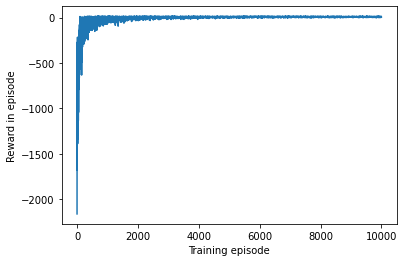

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(episode, reward_in_episode)
plt.xlabel('Training episode')
plt.ylabel('Reward in episode')
plt.show()